In [1]:
def edge_selector(neighbor_tracking):
    checker = 'NaN'
    while checker == 'NaN':
        val = random.choice(neighbor_tracking.keys())
        checker = neighbor_tracking[val]
    return val


def boundary_checker(x, spaceMin, spaceMax):
    if spaceMax in x or spaceMin in x:
        x = list(x)
        if x[0] == spaceMin:
            x[0] = spaceMin + 1
        elif x[0] == spaceMax:
            x[0] = spaceMax - 1
        elif x[1] == spaceMin:
            x[1] = spaceMin + 1
        elif x[1] == spaceMax:
            x[1] = spaceMax - 1
    return tuple(x)

## This initiates the movement count

In [2]:
move_count = {}

for k,v in layout_old.items():
    val = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
    move_count[k] = val

NameError: name 'layout_old' is not defined

In [3]:
node_number = 30
spaceMin = 0
spaceMax = 10

def illegal_position_generator(spaceMax, spaceMin):
    from itertools import permutations
    boundary = spaceMax + 2
    lower_boundary = spaceMin - 1
    items = range(lower_boundary, boundary)
    moves = {}
    i = 0
    for p in permutations(items, 2):
        moves[i] = p
        i += 1

    illegal_moves = {}
    legal_moves = {}
    for key,value in moves.items():
        for n,i in enumerate(value):
            try:        
                if i <= spaceMin or i >= spaceMax:
                    illegal_moves[key] = value
            except:
                continue
                
    for key, value in illegal_moves.iteritems():
        if value in moves.values():
            del moves[key]

    #This changes values into keys and vice versa
    moves = {y:x for x,y in moves.iteritems()}
    illegal_moves = {y:x for x,y in illegal_moves.iteritems()}
   
    # include positions at edges
    illegal_moves.update({(spaceMin,spaceMin):10000000, (spaceMax, spaceMax):100000001 })
    
    return moves, illegal_moves

# run function 
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)

def layout_gen(node_number, legal_moves): 
    import random
    
    wanted_keys = random.sample(legal_moves.keys(), node_number)
    #using dictionary comprehension to subset a dictionary by keys
    layout_old = dict((k, legal_moves[k]) for k in wanted_keys if k in legal_moves)
    
   # #I am going to omit making this dict because I can keep tract of names using the values of layout_old as a name attribute in a graph
   # #layout_names = {y:x for x,y in layout_old.iteritems()}
    
    return layout_old#, layout_names

#layout_old, node_names = layout_gen(node_number, legal_moves)
layout_old = layout_gen(node_number, legal_moves)


# This function creates illegal boundaries to follow

In [4]:
spaceMax = 300
spaceMin = 0

def illegal_boundaries(spaceMax):
    mydict = {}
    j = 1
    for i in range(spaceMax):
        mydict[ (0, i) ] = j
        j += 1
        mydict[ (i, 0) ] = j
        j += 1
        mydict[ (i+1, 0)] =j
        j += 1
        mydict[ (i, 0)] =j
        j += 1
        mydict[ (-1, i+1) ] = j
        j += 1
        mydict[ (-1, i) ] = j
        j += 1

    mydict[ (spaceMax-1, spaceMax-1) ] = 0
    
    
    return mydict

illegal_moves = illegal_boundaries(spaceMax)


In [5]:
print illegal_moves
print len(illegal_moves)

#layout_old = {(4, 5): 65, (3, 7): 55, (9, 5): 126, (8, 4): 113}
print layout_old

{(0, 86): 517, (-1, 225): 1356, (0, 175): 1051, (90, 0): 544, (177, 0): 1066, (-1, 66): 402, (0, 76): 457, (-1, 203): 1224, (0, 197): 1183, (229, 0): 1378, (-1, 36): 222, (0, 98): 589, (-1, 173): 1044, (9, 0): 58, (0, 271): 1627, (-1, 14): 90, (-1, 183): 1104, (61, 0): 370, (148, 0): 892, (0, 17): 103, (0, 293): 1759, (-1, 16): 102, (97, 0): 586, (184, 0): 1108, (287, 0): 1726, (0, 55): 331, (-1, 262): 1578, (0, 128): 769, (236, 0): 1420, (-1, 99): 600, (0, 45): 271, (-1, 232): 1398, (0, 166): 997, (0, 189): 1135, (16, 0): 100, (-1, 69): 420, (0, 67): 403, (-1, 242): 1458, (68, 0): 412, (155, 0): 934, (-1, 47): 288, (167, 0): 1006, (0, 121): 727, (-1, 212): 1278, (104, 0): 628, (207, 0): 1246, (0, 242): 1453, (0, 262): 1573, (-1, 49): 300, (0, 183): 1099, (-1, 190): 1146, (243, 0): 1462, (0, 232): 1393, (-1, 295): 1776, (-1, 27): 168, (39, 0): 238, (-1, 128): 774, (-1, 236): 1422, (0, 14): 85, (-1, 265): 1596, (0, 135): 811, (75, 0): 454, (162, 0): 976, (-1, 106): 642, (0, 36): 217, (-

# This movement function now should check boundaries too…

In [6]:
import random
from operator import add

position_selected = random.choice( layout_old.keys() )

def Mover(position_selected, layout_old, illegal_moves):
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4
    
    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))
    
    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    
    if new_position_selected == position_selected:
    
        if new_posit not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected
    
    

print layout_old
x,y = Mover(position_selected, layout_old, illegal_moves)
print x
print y

{(5, 9): 81, (2, 8): 44, (2, 1): 38, (8, 9): 117, (6, 2): 87, (9, 4): 125, (5, 1): 74, (3, 7): 55, (7, 2): 99, (3, 8): 56, (8, 1): 110, (6, 3): 88, (1, 5): 29, (5, 8): 80, (5, 3): 76, (4, 5): 65, (7, 5): 102, (2, 3): 39, (4, 2): 63, (7, 9): 105, (2, 7): 43, (8, 3): 112, (9, 2): 123, (6, 1): 86, (5, 7): 79, (7, 4): 101, (1, 8): 32, (9, 5): 126, (3, 4): 52, (8, 4): 113}
{(5, 9): 81, (2, 8): 44, (2, 1): 38, (8, 9): 117, (6, 2): 87, (9, 4): 125, (5, 1): 74, (3, 7): 55, (7, 2): 99, (3, 8): 56, (8, 1): 110, (6, 3): 88, (1, 5): 29, (5, 8): 80, (5, 3): 76, (4, 5): 65, (7, 5): 102, (2, 3): 39, (4, 2): 63, (7, 9): 105, (2, 7): 43, (8, 3): 112, (9, 2): 123, (6, 1): 86, (5, 7): 79, (7, 4): 101, (1, 8): 32, (9, 5): 126, (3, 4): 52, (8, 4): 113}
(9, 5)


# Movement value function looks good and returns the movement options well!

In [7]:
from operator import add

position_selected = (8, 5)
spaceMin = 0
spaceMax = 9

def movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax):
    total_moves = 4
    my_possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1) }

    finding_neighbors = {}
    j = 0
    for i in my_possibilities.values():
        finding_neighbors[tuple(map(add, position_selected, i))] = j
        j += 1

   
    if position_selected[0] == spaceMin and position_selected[1] == spaceMin:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax and position_selected[1] == spaceMax:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves 
    if position_selected[0] == spaceMin or position_selected[1] == spaceMin:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax or position_selected[1] == spaceMax:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    else:
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        #sd3 = set(illegal_moves.keys())
        current_moves = total_moves - len(sd1.intersection(sd2)) #- len(sd1.intersection(sd3))
        return current_moves
    
movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)

1

In [8]:
sum(move_count.values())

0

In [9]:
def allRxn(move, bind, dissociate):

    options = numpy.zeros((3, 1))
    options[0] = move/(move + bind + dissociate)
    options[1] = (bind + move)/(move + bind + dissociate)
    options[2] = (bind + move + dissociate)/(move + bind + dissociate)
    
    random_value = random.uniform(0, 1)
    
    if 0 <= random_value <= options[0]:
        return 'move'
    elif options[0] <= random_value <= options[1]:
        return 'bind'
    else:
        return 'dissociate'

In [10]:
import numpy
from igraph import *

# Association Function

In [11]:
x = (10, 8)
y = boundary_checker(x, spaceMin, spaceMax)

In [12]:
#5 nodes
import cProfile

cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')



         9 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-1-292b592b3811>:9(boundary_checker)
        1    0.000    0.000    0.000    0.000 <ipython-input-6-f58c869cd22e>:6(Mover)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:275(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




In [13]:
# 50 nodes
import cProfile


cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')




         9 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-1-292b592b3811>:9(boundary_checker)
        1    0.000    0.000    0.000    0.000 <ipython-input-6-f58c869cd22e>:6(Mover)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:275(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




In [14]:
# 5000 nodes

import cProfile

cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')

         10 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-1-292b592b3811>:9(boundary_checker)
        1    0.000    0.000    0.000    0.000 <ipython-input-6-f58c869cd22e>:6(Mover)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:275(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




KeyError: (8, 5)

In [ ]:
# 50,000 nodes

import cProfile

cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')

## speed with NTI's suggestion of dict lookup

In [15]:
# 50,000 nodes

import cProfile

 

In [16]:
profiling_output = numpy.array([[0, 0,0.001,0.009]])
print profiling_output

[[ 0.     0.     0.001  0.009]]


In [17]:
x = numpy.array([0, 0,0.001,0.009])
y = numpy.array([5, 50, 5000,50000])

Text(0,0.5,u'Time (sec)')

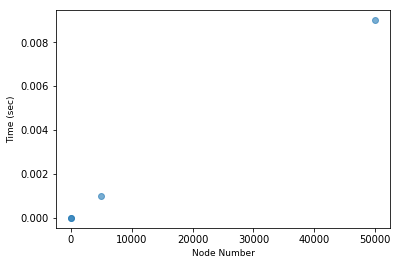

In [18]:
import matplotlib.pyplot as plt
#import numpy as np
%matplotlib inline


#plt.hist(newArray, bins=5, width=0.035, alpha=0.7, color='black')
#plt.suptitle('500T, 50N, 100S', fontsize=9)


plt.plot(y,x, "o", alpha=0.6)
plt.xlabel('Node Number',  fontsize=9)
plt.ylabel('Time (sec)',  fontsize=9)

In [19]:
from line_profiler import LineProfiler
import random

lp = LineProfiler()
lp_wrapper = lp(Mover)
lp_wrapper(position_selected, layout_old, illegal_moves)
lp.print_stats()

Timer unit: 1e-06 s

Total time: 0.000185 s
File: <ipython-input-6-f58c869cd22e>
Function: Mover at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def Mover(position_selected, layout_old, illegal_moves):
     7         1        163.0    163.0     88.1      possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
     8         1          1.0      1.0      0.5      movement_options = 4
     9                                               
    10         1         11.0     11.0      5.9      newDir = random.choice(possibilities.values())
    11         1          4.0      4.0      2.2      new_posit = tuple(map(add, position_selected, newDir))
    12                                               
    13         1          3.0      3.0      1.6      new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    14                                               
    15         1         

# Mover function without dict.get()

In [20]:
import random
from operator import add

position_selected = random.choice( layout_old.keys() )

def Mover(position_selected, layout_old, illegal_moves):
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4
    
    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))
    
    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    
    if new_position_selected == position_selected:
    
        if new_posit not in layout_old:        
            idx = layout_old[position_selected]

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected
    
    

#print layout_old
#x,y = Mover(position_selected, layout_old, illegal_moves)
#print x
#print y

In [21]:
from line_profiler import LineProfiler
import random

lp = LineProfiler()
lp_wrapper = lp(Mover)
lp_wrapper(position_selected, layout_old, illegal_moves)
lp.print_stats()

Timer unit: 1e-06 s

Total time: 2.3e-05 s
File: <ipython-input-20-09b6309fbc7c>
Function: Mover at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def Mover(position_selected, layout_old, illegal_moves):
     7         1          2.0      2.0      8.7      possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
     8         1          1.0      1.0      4.3      movement_options = 4
     9                                               
    10         1          7.0      7.0     30.4      newDir = random.choice(possibilities.values())
    11         1          6.0      6.0     26.1      new_posit = tuple(map(add, position_selected, newDir))
    12                                               
    13         1          3.0      3.0     13.0      new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    14                                               
    15         1         

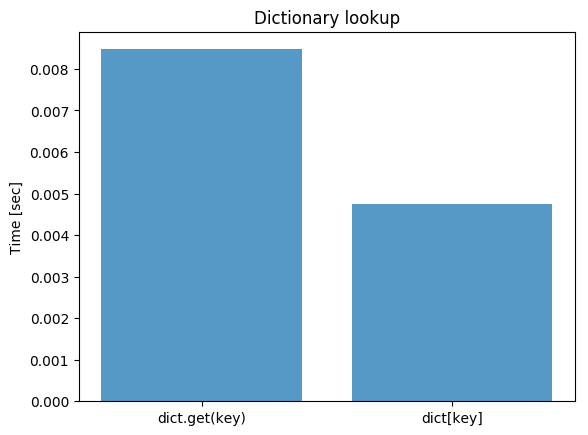

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('dict.get(key)', 'dict[key]')
y_pos = np.arange(len(objects))
performance = [0.008472, 0.00476]
 
plt.bar(y_pos, performance, align='center', alpha=0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Time [sec]')
plt.title('Dictionary lookup')
 
plt.show()

Text(0,0.5,u'Time (sec)')

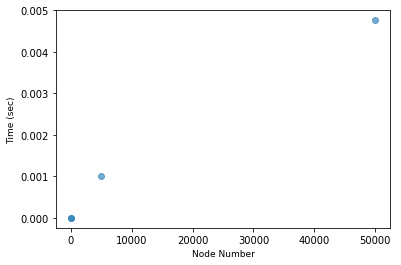

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


x = numpy.array([0, 0,0.001,0.00476])
y = numpy.array([5, 50, 5000,50000])

plt.plot(y,x, "o", alpha=0.6)
plt.xlabel('Node Number',  fontsize=9)
plt.ylabel('Time (sec)',  fontsize=9)

In [24]:
# 50,000
cProfile.run('layout_old, pos = Mover(position_selected, layout_old, illegal_moves)')

         9 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-1-292b592b3811>:9(boundary_checker)
        1    0.000    0.000    0.000    0.000 <ipython-input-20-09b6309fbc7c>:6(Mover)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 random.py:275(choice)
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {map}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}




# Association Function

In [25]:
import random
from igraph import *
g = Graph(4)

d = { (3,11):0, (13,2):1, (12,3):2, (11,6):3, (13,1):4, (11,7):5, (10,7):6 }
new_d = {a:[c for c, b in d.items() if abs(math.hypot(*a)-math.hypot(*c)) <= 1 and c != a] for a, h in d.items()}
final_d = {a:"nan" if not b else b for a, b in new_d.items()}


g.vs['name'] = final_d.keys()

x=(10, 7)
#d = {(1, 1): 0, (2, 1): 1, (3, 1): 2, (10, 41):3}

import math

d = layout_old


    


def association_function(x, d):
    options = final_d[x]
    if options == 'nan':
        pass
    else:
        toBind = random.choice(options)
        v1_position = g.vs['name'].index( toBind )
        v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 4 and g.degree(v2_position) < 4:
            g.add_edge(v1_position, v2_position)
    return g

In [26]:
posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
x = (10, 1)
new_posit = posit + x
d = {(11,1):0, (121,12):1, (324, 23):2, (9,2):3, (9,1):4}

# this is my new association function as of 19-12-17

In [27]:
new_list = []
new_dict = {}
posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
g = Graph(6)
x = (10, 1)
d = {(11,1):0, (121,12):1, (324, 23):2, (9,2):3, (9,1):4, (10,1):5}
g.vs['name'] = d.keys()

def new_association_function(x, d, g):
    new_list = []
    posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
    
    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list        
        else:
            new_dict[x] = 'NaN'

    if new_dict[x] == 'NaN':
        pass
    else:
        options = new_dict[x]
        toBind = random.choice(options)
        v1_position = g.vs['name'].index( toBind )
        v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 4 and g.degree(v2_position) < 4:
            g.add_edge(v1_position, v2_position)
    return g

In [28]:
print new_association_function((10,1), d, g)

IGRAPH UN-- 6 0 --
+ attr: name (v)


## Dissociation function

In [29]:
new_list = []
new_dict = {}
posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
g = Graph(6)
x = (10, 1)
d = {(11,1):0, (121,12):1, (324, 23):2, (9,2):3, (9,1):4, (10,1):5}
g.vs['name'] = d.keys()

def dissociation_function(x, d, g):
    new_list = []
    posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
    
    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list        
        else:
            new_dict[x] = 'NaN'

    if new_dict[x] == 'NaN':
        pass
    else:
        options = new_dict[x]
        toBind = random.choice(options)
        v1_position = g.vs['name'].index( toBind )
        v2_position = g.vs['name'].index( x )

        g.add_edge(v1_position, v2_position)
    return g

In [30]:
x = g.get_edgelist()
y = random.choice(x)

IndexError: list index out of range

In [31]:
print x
print ''
print y
print ''
print g
print ''
print g.vs['name']
print ''
print g.vs['name'][22]
print g.vs['name'][23]

[]

[    5    50  5000 50000]

IGRAPH UN-- 6 0 --
+ attr: name (v)

[(9, 1), (9, 2), (121, 12), (324, 23), (11, 1), (10, 1)]



IndexError: list index out of range

In [32]:

x = g.get_edgelist()
y = random.choice(x)
g.delete_edges(y)
print ''
print g

IndexError: list index out of range

## new_association_function2

In [33]:
g = Graph(len(layout_old))
g.vs['name'] = layout_old.keys()
new_dict = {}
def new_association_function2(x, d, g, new_dict, val):
    new_list = []
    posit = numpy.array([[1,0], [0,1], [-1, 0], [0,-1] ])
    
    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list
    if x in new_dict and val == True:
        options = new_dict[x]
        toBind = random.choice(options)
        v1_position = g.vs['name'].index( str(toBind) )
        v2_position = g.vs['name'].index( str(x) )
        if g.degree(v1_position) < 4 and g.degree(v2_position) < 4:
            g.add_edge(v1_position, v2_position)
        return new_dict[x]
    elif x in new_dict and val == False:
        return new_dict[x]
    else:
        new_dict[x] = 'NaN'
        return new_dict[x]

    

In [34]:
pos = (1, 11)
y=new_association_function2(pos, layout_old, g, new_dict, False)
print y

NaN


## Profiling New Association Function

In [35]:
# 10 nodes

import cProfile

cProfile.run('new_association_function2(position_selected, layout_old, g, neighbor_tracking, True)')

         2 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




NameError: name 'neighbor_tracking' is not defined

In [36]:
# 100 nodes
cProfile.run('new_association_function2(position_selected, layout_old, g, neighbor_tracking, True)')

         2 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




NameError: name 'neighbor_tracking' is not defined

In [37]:
#1000 nodes
cProfile.run('new_association_function(position_selected, layout_old, g, neighbor_tracking, True)')

         2 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




NameError: name 'neighbor_tracking' is not defined

In [38]:
#5,000
cProfile.run('new_association_function(position_selected, layout_old, g, neighbor_tracking, True)')

         2 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




NameError: name 'neighbor_tracking' is not defined

In [39]:
#10,000
cProfile.run('new_association_function(position_selected, layout_old, g, neighbor_tracking, True)')

         2 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




NameError: name 'neighbor_tracking' is not defined

## Movement Function profiling plot

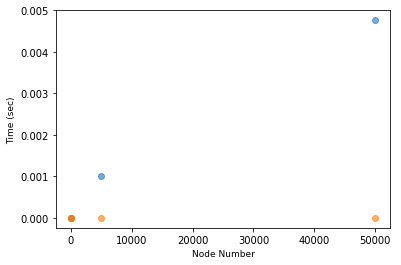

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline


y = numpy.array([0, 0,0.001,0.00476])
y2 = numpy.array([0,0,0,0])
x = numpy.array([5, 50, 5000,50000])

f = plt.figure()
plt.plot(x,y, "o", alpha=0.6)
plt.plot(x,y2, "o", alpha=0.6)
plt.xlabel('Node Number',  fontsize=9)
plt.ylabel('Time (sec)',  fontsize=9)

f.savefig("movement_profiling.pdf", bbox_inches='tight')

## Association Function profiling plot

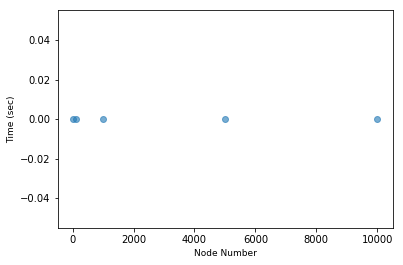

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

f = plt.figure()
x = numpy.array([0,0,0,0,0])
y = numpy.array([10, 100, 1000,5000, 10000])

plt.plot(y,x, "o", alpha=0.6)
plt.xlabel('Node Number',  fontsize=9)
plt.ylabel('Time (sec)',  fontsize=9)
f.savefig("association_profiling.pdf", bbox_inches='tight')

## This initiates the association dict & the association count

In [42]:
g = Graph(len(layout_old))
g.vs['name'] = layout_old.keys()
new_dict = {}

for k,v in layout_old.items():
    new_association_function2(k, layout_old, g, new_dict, False)
    #if output[k] != 'NaN':
    #    assoc_count[k] = 4 - len(output[k])
    #else:
    #    assoc_count[k] = 4
    


In [43]:
new_dict

{(1, 5): 'NaN',
 (1, 8): [(2, 8)],
 (2, 1): 'NaN',
 (2, 3): 'NaN',
 (2, 7): [(3, 7), (2, 8)],
 (2, 8): [(3, 8), (1, 8), (2, 7)],
 (3, 7): [(3, 8), (2, 7)],
 (3, 8): [(2, 8), (3, 7)],
 (4, 2): 'NaN',
 (4, 4): [(4, 5)],
 (4, 5): [(4, 4)],
 (5, 1): [(6, 1)],
 (5, 3): [(6, 3)],
 (5, 7): [(5, 8)],
 (5, 8): [(5, 9), (5, 7)],
 (5, 9): [(5, 8)],
 (6, 1): [(6, 2), (5, 1)],
 (6, 2): [(7, 2), (6, 3), (6, 1)],
 (6, 3): [(5, 3), (6, 2)],
 (7, 2): [(6, 2)],
 (7, 4): [(8, 4), (7, 5)],
 (7, 5): [(7, 4)],
 (7, 9): [(8, 9)],
 (8, 1): 'NaN',
 (8, 3): [(8, 4)],
 (8, 4): [(9, 4), (7, 4), (8, 3)],
 (8, 9): [(7, 9)],
 (9, 2): 'NaN',
 (9, 4): [(9, 5), (8, 4)],
 (9, 5): [(9, 4)]}

## mRNP movement  

In [44]:
import random
from operator import add

position_selected = random.choice( layout_old.keys() )

def testMover(position_selected, layout_old, illegal_moves):
    # set up possible moves
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4

    # randomly select where to move to
    newDir = random.choice(possibilities.values())
    # 
    new_posit = tuple(map(add, position_selected, newDir))
    
    
#    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    
    neigh = []
    neigh = neighbor_tracking[position_selected]
    new_position = []
    new_position.append(position_selected)

    all_neigh = neigh + new_position

    # keeping this temporarily 
    new_position_selected = position_selected
    if new_position_selected == position_selected:
    
        if new_posit not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected
    
    

print layout_old
x,y = Mover(position_selected, layout_old, illegal_moves)
print x
print y

{(5, 9): 81, (2, 8): 44, (2, 1): 38, (8, 9): 117, (6, 2): 87, (9, 4): 125, (5, 1): 74, (3, 7): 55, (7, 2): 99, (3, 8): 56, (8, 1): 110, (4, 4): 52, (6, 3): 88, (1, 5): 29, (5, 8): 80, (5, 3): 76, (4, 5): 65, (7, 5): 102, (2, 3): 39, (4, 2): 63, (7, 9): 105, (2, 7): 43, (8, 3): 112, (9, 2): 123, (6, 1): 86, (5, 7): 79, (7, 4): 101, (1, 8): 32, (9, 5): 126, (8, 4): 113}
{(5, 9): 81, (2, 8): 44, (8, 9): 117, (6, 2): 87, (9, 4): 125, (5, 1): 74, (3, 7): 55, (7, 2): 99, (3, 8): 56, (8, 1): 110, (4, 4): 52, (6, 3): 88, (1, 5): 29, (5, 8): 80, (5, 3): 76, (1, 1): 38, (4, 5): 65, (7, 5): 102, (2, 3): 39, (4, 2): 63, (7, 9): 105, (2, 7): 43, (8, 3): 112, (9, 2): 123, (6, 1): 86, (5, 7): 79, (7, 4): 101, (1, 8): 32, (9, 5): 126, (8, 4): 113}
(1, 1)


In [45]:
my_tuple = ((0, 1), (3, 5), (0, 0))
sub = (1, 0)

result = ()
for i in range(len(my_tuple)):
    result = result + (tuple( map (add, my_tuple[i], sub)), )
print result

((1, 1), (4, 5), (1, 0))


In [46]:
print edge_selected
print neighbor_tracking[edge_selected]

NameError: name 'edge_selected' is not defined

In [47]:
position_selected = random.choice( layout_old.keys() )

if position_selected in neighbor_tracking:
    #del move_count[position_selected]
    #del neighbor_tracking[position_selected]

    layout_old, pos = Mover(position_selected, layout_old, illegal_moves)
    

NameError: name 'neighbor_tracking' is not defined

In [48]:
neighbor_tracking[position_selected]

NameError: name 'neighbor_tracking' is not defined

In [49]:
t = []
t = neighbor_tracking[position_selected]
f = []
f.append(position_selected)

z = t + f
print z

NameError: name 'neighbor_tracking' is not defined

##### Left off here (15-03-18).  Trying to add newDir to tuToList to move all neighbors in a single direction 

In [50]:
t = []
t = neighbor_tracking[position_selected]
f = []
f.append(position_selected)

z = t + f
print z

tuToList = []
for i in z:
    i = list(i)
    tuToList.append(i)
print tuToList

possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
movement_options = 4

newDir = random.choice(possibilities.values() )
newDir = int(newDir)
#map(add, tuToList, newDir)


NameError: name 'neighbor_tracking' is not defined

In [51]:
mRNP_members = []
mRNP_members.append(position_selected, neighbor_tracking[position_selected])

NameError: name 'neighbor_tracking' is not defined

# Gillespie

## Initiate node layout

In [52]:
spaceMax = 15
spaceMin = 0
node_number = 150
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)
layout_old = layout_gen(node_number, legal_moves)

## This initiates the movement count

In [53]:
move_count = {}

for k,v in layout_old.items():
    val = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
    move_count[k] = val

## This initiates the neighbor tracking

In [54]:
import collections
g = Graph(len(layout_old))

output = {}
i = 0
for k,v in layout_old.items():
    output[str(k)] = i
#    output[k] = i
    i += 1    
od = collections.OrderedDict(sorted(output.items()))
g.vs['name'] = od.keys()


neighbor_tracking = {}

for k,v in layout_old.items():
    new_association_function2(k, layout_old, g, neighbor_tracking, False)
    
    

## This initiates neighbor edge count

In [55]:
bind_count = {}
for k,v in neighbor_tracking.items():
    bind_count[k] = len(v)


# Gillespie

In [60]:
graph_stored = []
graph_move = []
t = 0
total_time = 1000
k_move = 1e-3
k_bind = 5e-3
k_off = 0.00001
tau = 1e-3
times = []
degree_dist = {}
degree_dist_all = {}

# this sets up initial movement options
#for k,v in layout_old.items():
#    movement_positions[v] = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
        
while t <= total_time:


    ## Calculate all possible reactions

    move = sum(move_count.values() )                              # movement
    move_k = move * k_move * tau

    bind = sum(bind_count.values() )                              # binding
    bind_k = bind * k_bind * tau

    dissociate = len(g.get_edgelist())                            # dissociation
    dissociate_k = dissociate * k_off * tau


    rate_sum = move_k + bind_k + dissociate_k                     # Time at which the next reaction will take place
    total_tau = random.expovariate(lambd=rate_sum)                      # Time at which the next reaction will take place

    if not times:
        times.append(total_tau)
    else:
        total_tau = total_tau + times[t-1]
        times.append(total_tau)                                             # Save time as a tuple
        
    reaction = allRxn(move_k, bind_k, dissociate_k)               # Sample from uniform distribution

    if reaction == 'move':
        # randomly select a node to move
        position_selected = random.choice(layout_old.keys() )                  
                
        if position_selected in layout_old:
            # delete position selected from move_count dict
            del move_count[position_selected]
            # delete position selected from neighbor_tracking dict
            del neighbor_tracking[position_selected]
        
### mRNP decisions goes here       
### mRNP decisions goes here       
### mRNP decisions goes here       
### mRNP decisions goes here       
### mRNP decisions goes here       

            # if position_selected is of degree 0, then move it normally using Mover function
            layout_old, pos = Mover(position_selected, layout_old, illegal_moves)           

            # this will update the count of moves the selected object can perform still
            move_count[pos] = movement_finder(pos, illegal_moves, layout_old, spaceMin, spaceMax)
            new_association_function2(pos, layout_old, g, neighbor_tracking, False)


            g.vs.find(str(position_selected))['name'] = str(pos)


            if pos != position_selected:
                v1_position = g.vs['name'].index(str(pos))


                if g.degree(v1_position) > 0:
                    g.delete_edges( g.incident(str(pos), mode="all"))

        
    if reaction == 'bind':
        
        position_selected = edge_selector(neighbor_tracking)                  # select a node with neighbors randomly for forming an edge
        
        move_count.pop(position_selected)
        neighbor_tracking.pop(position_selected)
        
        # bind & update move_count and neighbor_tracking dict
        
        new_association_function2(position_selected, layout_old, g, neighbor_tracking, True)
        move_count[position_selected] = movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)
        
        
        g.simplify(g)                                                        # simplify the graph  
        
        print 'bind', position_selected
        print g

    if reaction == 'dissociate':
        
        edge_list = g.get_edgelist()
        edge_selected = random.choice(edge_list)
        g.delete_edges(edge_selected)
    
    
    degree_dist[t] = sum(g.degree())   # Capture degree distribution per step
    degree_dist_all[t] = g.degree()
        
    print reaction

    graph_stored.append(g)               # store graph at each interval
    graph_move.append(move)
    
    t += 1



bind (3, 10)
IGRAPH UN-- 150 206 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 15) --
 (10, 3) -- (10, 4), (10, 2), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 2) -- (10, 3), (9, 2)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 (12, 1) -- (11, 1

  (9, 8) -- (10, 8), (9, 7)
bind
bind (4, 4)
IGRAPH UN-- 150 209 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 15) --
 (10, 3) -- (10, 4), (10, 2), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 2) -- (10, 3), (9, 2)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11

  (9, 8) -- (10, 8), (9, 7)
bind
bind (9, 1)
IGRAPH UN-- 150 209 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (10, 2), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 2) -- (10, 3), (9, 2)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11

IGRAPH UN-- 150 206 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 1) --
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -

  (9, 8) -- (10, 8), (9, 7)
bind
bind (3, 10)
IGRAPH UN-- 150 207 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 1) --
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 (

IGRAPH UN-- 150 207 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 1) --
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -

IGRAPH UN-- 150 208 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 1) --
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -

IGRAPH UN-- 150 208 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 1) --
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -

  (9, 8) -- (10, 8), (9, 7)
bind
bind (10, 11)
IGRAPH UN-- 150 207 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 1) --
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 

  (9, 8) -- (10, 8), (9, 7)
bind
move
bind (13, 11)
IGRAPH UN-- 150 205 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (12, 1)
 (10, 1) --
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12,

  (9, 8) -- (10, 8)
bind
bind (4, 6)
IGRAPH UN-- 150 207 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (1

IGRAPH UN-- 150 207 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (9, 13)
(10, 14) --
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8), (12, 9)
 (12, 1) -- (11, 1), (12, 2), (

  (9, 8) -- (10, 8)
bind
bind (10, 5)
IGRAPH UN-- 150 208 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- 

IGRAPH UN-- 150 205 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1) -- (11, 1), 

  (9, 8) -- (10, 8)
bind
bind (5, 12)
IGRAPH UN-- 150 203 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- 

IGRAPH UN-- 150 203 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1) -- (11, 1), 

bind (10, 4)
IGRAPH UN-- 150 200 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1)

IGRAPH UN-- 150 201 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12, 8)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1) -- 

  (9, 8) -- (10, 8)
bind
bind (1, 9)
IGRAPH UN-- 150 203 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12,

IGRAPH UN-- 150 204 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12, 8)
 (11, 9) -- (10, 9), (11, 8)
 (12

  (9, 8) -- (10, 8)
bind
bind (2, 4)
IGRAPH UN-- 150 204 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12,

bind
bind (3, 10)
IGRAPH UN-- 150 204 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12, 8)
 (11, 9) -- (10

IGRAPH UN-- 150 204 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12, 8)
 (11, 9) -- (10, 9), (11, 8)
 (12

IGRAPH UN-- 150 203 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9), (2, 10)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12, 8)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1) -- 

IGRAPH UN-- 150 200 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9), (12, 8)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1) -- (11, 1), 

IGRAPH UN-- 150 200 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1) -- (11, 1), (12, 2), 

  (9, 8) -- (10, 8)
bind
bind (5, 7)
IGRAPH UN-- 150 201 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (

IGRAPH UN-- 150 202 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (10, 9), (11, 8)
 (12, 1) -- (11, 1), (12, 2), 

  (9, 8) -- (10, 8)
bind
bind (1, 7)
IGRAPH UN-- 150 205 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (10, 9), (11, 8), (9, 8)
 (10, 9) -- (10, 8), (11, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (1

IGRAPH UN-- 150 203 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (11, 8), (9, 8)
  (9, 9) --
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (11, 8)
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -- (12, 11

IGRAPH UN-- 150 203 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (11, 8), (9, 8)
  (9, 9) --
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6), (11, 8)
 (11, 8) -- (10, 8), (11, 7), (11, 9)
 (11, 9) -- (11, 8)
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -- (12, 11

  (9, 8) -- (10, 8)
bind
bind (1, 4)
IGRAPH UN-- 150 201 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (9, 8)
  (9, 9) --
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6)
 (12, 8) --
 (11, 9) --
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -- (12, 11), (13, 10)
(12

  (9, 8) -- (10, 8)
bind
bind (1, 7)
IGRAPH UN-- 150 202 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (9, 8)
  (9, 9) -- (8, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6)
 (12, 8) --
 (11, 9) --
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -- (12, 11), (13, 

  (9, 8) -- (10, 8)
bind
bind (10, 11)
IGRAPH UN-- 150 202 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (9, 8)
  (9, 9) -- (8, 9)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6)
 (12, 8) --
 (11, 9) --
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -- (12, 11), (13

  (9, 8) -- (10, 8), (9, 9)
bind
bind (2, 9)
IGRAPH UN-- 150 203 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (9, 8)
  (9, 9) -- (8, 9), (9, 8)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6)
 (12, 8) --
 (11, 9) --
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) --

# Let off here 15-12-18

In [ ]:
# get degree of all nodes
dictOfWords = dict.fromkeys(g.vs.select(_degree_ge=1)['name'] , 'deg >= 1')

# if degree of position selected has edges of greater than or equal to 1 then move all together
if str(position_selected) in dictOfWords:

    # randomly move every connected node
    positions, dirSelected = neighbor_getter_and_mover(position_selected, g)
    
    # if I did not change positions, then continue, otherwise delete previous position and add new positions
    if position_selected in positions:
        continue        
    else:

else:

In [104]:
print positions
print position_selected

set([(11, 4), (10, 5), (10, 3), (10, 4)])
(10, 4)


In [105]:
if position_selected in positions:
    print 'yes'

yes


In [50]:
#print tuple(g.vs.select(_degree_ge=4)['name'])
#print position_selected
#print g.neighbors(10, mode="all")

#tuple(g.vs.select(_degree_ge=4)['name'])

#print g.vs.select(_degree_ge=1)['name']
dictOfWords = dict.fromkeys(g.vs.select(_degree_ge=1)['name'] , 'deg >= 1')
if str( (1, 13) ) in dictOfWords:
    print 'yes'

In [920]:
print 'this gives me the index of this position in the graph'
print g.vs['name'].index( str((1, 13)) )
print 'this gets me the index of the neighbors'
print g.neighbors( str((1, 7)), mode='all' )

this gives me the index of this position in the graph
3
this gets me the index of the neighbors
[7, 9, 73]


# left off here 7/11/18

_What I now need to do is to update this function so as to have it DELETE the old positions in layout-old for the selected nodes & put in the new positions of the nodes_

This function gets ALL of the names of direct interactors of a specific node

In [108]:
def neighbor_getter_and_mover(position_selected, g):
    # Import literal_eval to deal with quotes around tuple down below
    from ast import literal_eval
    
    # Set up empty list
    neighors_original_posit = []
    # Get neighbors of the selected position
    neighbor_idx = g.neighbors( str(position_selected), mode='all' )
    # for loop to pool up the bound nodes to position_selected
    for i in neighbor_idx:
        v_fix = literal_eval(g.vs['name'][i])
        neighors_original_posit.append(v_fix)
    neighors_original_posit = tuple(neighors_original_posit)
    
    # update ALL of the bound nodes to position_selected along with position selected

    # Set up dict of movement possibilities
    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    
    # Randomly select a movement option from a dict
    newDir = random.choice(possibilities.values() )

    # Set up a set
    result = set()
    # Loop through neighors_original_posit tuple & add the new direction to move toward
    for i in range(len(neighors_original_posit)):
        result.add(tuple(map(add, neighors_original_posit[i], newDir)))


    if result.intersection(set(layout_old.keys())):
        # this part says my new positions overlap with previous ones
        neighors_original_posit = neighors_original_posit + (position_selected,)
        return set(neighors_original_posit), newDir
    else:
        # remove old entires in layout_old
        
        idx = layout_old[position_selected]
        
        del layout_old[position_selected]
        layout_old[new_posit] = idx
        
        
        entries_to_remove(entries= neighors_original_posit, the_dict=layout_old)
        
        
        # this the new results, because they don't overlap 
        result.add(tuple(map(add, position_selected, newDir)))
        return result, newDir

In [110]:
neighbor_getter_and_mover((6, 2), g)

({(5, 2), (6, 2), (6, 3), (7, 2)}, (0, 1))

In [88]:
print g

IGRAPH UN-- 150 204 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) -- (1, 9)
 (1, 12) -- (1, 13), (2, 12)
 (1, 13) -- (1, 12), (2, 13)
  (1, 2) --
  (1, 4) -- (2, 4)
  (1, 8) -- (1, 9), (1, 7)
  (1, 9) -- (1, 10), (1, 8), (2, 9)
(10, 11) -- (10, 12)
(10, 12) -- (10, 11), (10, 13), (9, 12)
(10, 13) -- (10, 12), (10, 14), (9, 13)
(10, 14) -- (10, 13)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4)
 (10, 5) -- (10, 4), (10, 6), (11, 5), (9, 5)
 (10, 6) -- (10, 5), (10, 7), (11, 6), (9, 6)
 (10, 7) -- (10, 6), (10, 8), (11, 7)
 (10, 8) -- (10, 7), (9, 8)
  (9, 9) -- (8, 9), (9, 8)
 (11, 1) -- (10, 1), (12, 1)
 (10, 1) -- (11, 1), (9, 1)
 (11, 3) -- (10, 3), (11, 4), (12, 3)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (10, 6), (11, 5), (11, 7), (12, 6)
 (11, 7) -- (10, 7), (11, 6)
 (12, 8) -- (13, 8)
 (11, 9) --
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -- (12, 11), (13, 10)
(12, 11) -- (12, 

In [1029]:
if tt.issubset(layout_old_set):
    print "yes"
else:
    print "no"

no


In [107]:

def entries_to_remove(entries, layout_old):
    value_stored = []
    for key in entries:
        if key in layout_old:
            value_stored.append(layout_old.get(key) )
    for key in entries:
        if key in layout_old:
            del layout_old[key]
    return value_stored


In [1184]:
#print layout_old
entries = ( (11, 5), (10, 7) )

entries_to_remove(entries, layout_old)

{(5, 8): 110, (4, 0): 87, (10, 8): 196, (5, 5): 90, (11, 5): 210, (10, 7): 194, (6, 10): 129, (14, 1): 257, (4, 10): 95, (3, 2): 71, (2, 6): 57, (9, 14): 184, (8, 2): 173, (5, 11): 113, (9, 3): 174, (14, 2): 258, (13, 10): 249, (3, 12): 80, (1, 12): 63, (3, 1): 70, (2, 11): 62, (5, 14): 116, (10, 14): 201, (6, 13): 132, (7, 8): 144, (14, 8): 264, (12, 8): 230, (13, 13): 251, (3, 11): 79, (2, 1): 53, (8, 9): 162, (4, 12): 97, (9, 4): 175, (10, 3): 191, (7, 2): 139, (12, 2): 224, (14, 5): 261, (13, 3): 242, (0, 11): 45, (3, 6): 74, (1, 10): 44, (8, 6): 160, (4, 1): 104, (9, 7): 178, (6, 4): 141, (11, 4): 209, (7, 1): 138, (6, 11): 130, (12, 7): 229, (14, 6): 262, (13, 6): 246, (4, 11): 96, (3, 5): 73, (2, 7): 58, (9, 13): 183, (8, 3): 157, (5, 10): 112, (4, 6): 91, (6, 1): 121, (5, 7): 92, (11, 3): 208, (14, 12): 268, (12, 4): 226, (14, 3): 259, (13, 9): 231, (4, 8): 93, (2, 8): 59, (9, 8): 179, (6, 2): 122, (11, 14): 218, (7, 11): 147, (14, 9): 265, (3, 10): 78, (8, 10): 163, (4, 13): 9

[110, 196]

In [1168]:
#print layout_old
tt = ((13, 4), (12, 12))
#entries_to_remove((13, 4), layout_old)
for key in tt:
    if key in layout_old:
        print 'yes'
        print layout_old.get(key)

yes
243
yes
216


In [1096]:
#idx = layout_old[position_selected]

#del layout_old[position_selected]
#layout_old[new_posit] = idx


entries = {(7, 12): 148, (14, 4): 260}
new_positsxx = ((1, 2), (0, 0))
entries_to_remove(entries=new_positsxx, the_dict=entries)

for k, v in entries.iteritems():
    # I need to store the value (i.e. index)
    value = v
    # I need to delete the entry from layout_old

    # I then need to add the new position with the old value
    entries[] = value

148
260


In [1066]:
print layout_old

{(7, 12): 148, (14, 4): 260, (13, 4): 243, (12, 12): 216, (3, 7): 75, (2, 5): 56, (5, 8): 110, (4, 0): 87, (10, 8): 196, (5, 5): 90, (11, 5): 210, (10, 7): 194, (6, 10): 129, (14, 1): 257, (4, 10): 95, (3, 2): 71, (2, 6): 57, (9, 14): 184, (8, 2): 173, (5, 11): 113, (9, 3): 174, (14, 2): 258, (13, 10): 249, (3, 12): 80, (1, 12): 63, (3, 1): 70, (2, 11): 62, (5, 14): 116, (10, 14): 201, (6, 13): 132, (7, 8): 144, (14, 8): 264, (12, 8): 230, (13, 13): 251, (3, 11): 79, (2, 1): 53, (8, 9): 162, (4, 12): 97, (9, 4): 175, (10, 3): 191, (7, 2): 139, (12, 2): 224, (14, 5): 261, (13, 3): 242, (0, 11): 45, (3, 6): 74, (1, 10): 44, (8, 6): 160, (4, 1): 104, (9, 7): 178, (6, 4): 141, (11, 4): 209, (10, 4): 192, (7, 1): 138, (6, 11): 130, (12, 7): 229, (14, 6): 262, (13, 6): 246, (4, 11): 96, (3, 5): 73, (2, 7): 58, (9, 13): 183, (8, 3): 157, (5, 10): 112, (4, 6): 91, (6, 1): 121, (5, 7): 92, (11, 3): 208, (14, 12): 268, (12, 4): 226, (14, 3): 259, (13, 9): 231, (4, 8): 93, (2, 8): 59, (9, 8): 179

In [840]:
layout_old[(3, 12)]

63

In [841]:
print g

IGRAPH UN-- 150 181 --
+ attr: name (v)
+ edges (vertex names):
 (1, 10) --
 (0, 11) --
 (0, 12) --
 (1, 13) -- (2, 13)
  (1, 2) --
  (0, 3) --
  (1, 4) -- (2, 4)
  (1, 6) -- (1, 7), (2, 6)
  (1, 7) -- (1, 6), (1, 8), (2, 7)
  (1, 8) -- (1, 7), (2, 8)
 (10, 1) -- (11, 1), (9, 1)
(10, 11) -- (10, 12), (11, 11), (9, 11)
(10, 12) -- (10, 11), (9, 12)
(10, 14) -- (11, 14), (9, 14)
 (11, 2) -- (11, 1), (11, 3), (12, 2)
 (10, 3) -- (10, 4), (11, 3), (9, 3)
 (10, 4) -- (10, 3), (10, 5), (11, 4), (9, 4)
 (10, 5) -- (10, 4), (11, 5), (9, 5)
 (10, 7) -- (10, 8)
 (10, 8) -- (10, 7), (9, 8)
 (11, 1) -- (10, 1), (11, 2), (12, 1)
(12, 12) --
(11, 13) -- (11, 14)
(11, 14) -- (10, 14), (11, 13), (12, 14)
 (11, 3) -- (11, 2), (10, 3), (11, 4)
 (11, 4) -- (10, 4), (11, 3), (11, 5), (12, 4)
 (11, 5) -- (10, 5), (11, 4), (11, 6), (12, 5)
 (11, 6) -- (11, 5), (11, 7)
 (11, 7) -- (11, 6), (11, 8), (12, 7)
 (11, 8) -- (11, 7), (12, 8)
 (12, 1) -- (11, 1), (12, 2), (13, 1)
(12, 10) -- (13, 10)
(11, 11) -- (10

# mRNP movement

In [890]:
import random
from operator import add



position_selected = random.choice( layout_old.keys() )

def testMover(position_selected, layout_old, illegal_moves):
    
    
    
    # new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)
    
    neigh = []
    neigh = neighbor_tracking[position_selected]
    new_position = []
    new_position.append(position_selected)

    all_neigh = neigh + new_position

    # keeping this temporarily 
    new_position_selected = position_selected
    if new_position_selected == position_selected:
    
        if new_posit not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:        
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected
    
    

print layout_old
x,y = Mover(position_selected, layout_old, illegal_moves)
print x
print y

{(12, 1): 223, (11, 11): 233, (7, 12): 148, (14, 4): 260, (13, 4): 243, (12, 12): 216, (1, 6): 40, (3, 7): 75, (2, 5): 56, (5, 8): 110, (4, 0): 87, (10, 8): 196, (5, 5): 90, (11, 5): 210, (10, 7): 194, (6, 10): 129, (14, 1): 257, (4, 10): 95, (3, 2): 71, (2, 6): 57, (9, 14): 184, (8, 2): 173, (5, 11): 113, (9, 3): 174, (14, 2): 258, (13, 10): 249, (3, 12): 80, (1, 12): 63, (3, 1): 70, (2, 11): 62, (5, 14): 116, (10, 14): 201, (6, 13): 132, (7, 8): 144, (14, 8): 264, (12, 8): 230, (13, 13): 251, (3, 11): 79, (2, 1): 53, (8, 9): 162, (4, 12): 97, (9, 4): 175, (10, 3): 191, (7, 2): 139, (12, 2): 224, (14, 5): 261, (13, 3): 242, (0, 11): 45, (3, 6): 74, (1, 10): 44, (8, 6): 160, (4, 1): 104, (9, 7): 178, (6, 4): 141, (11, 4): 209, (10, 4): 192, (7, 1): 138, (6, 11): 130, (12, 7): 229, (14, 6): 262, (13, 6): 246, (4, 11): 96, (3, 5): 73, (2, 7): 58, (9, 13): 183, (8, 3): 157, (5, 10): 112, (4, 6): 91, (6, 1): 121, (5, 7): 92, (11, 3): 208, (14, 12): 268, (12, 4): 226, (14, 3): 259, (13, 9):

# Degree distribution result for 7000 objects

In [76]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


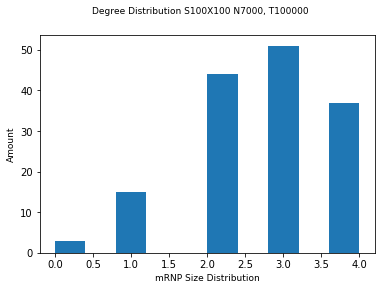

In [230]:
dd = g.degree()
plt.hist(dd)
plt.suptitle('Degree Distribution S100X100 N7000, T100000 ', fontsize=9)
plt.ylabel('Amount',  fontsize=9)
plt.xlabel('mRNP Size Distribution',  fontsize=9)
plt.show()



# Degree distribution result for 700 objects


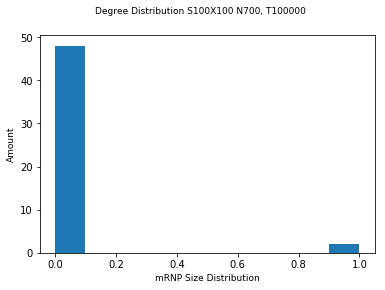

In [78]:
dd = g.degree()
plt.hist(dd)
plt.suptitle('Degree Distribution S100X100 N700, T100000 ', fontsize=9)
plt.ylabel('Amount',  fontsize=9)
plt.xlabel('mRNP Size Distribution',  fontsize=9)
plt.show()



## mRNPs per time step

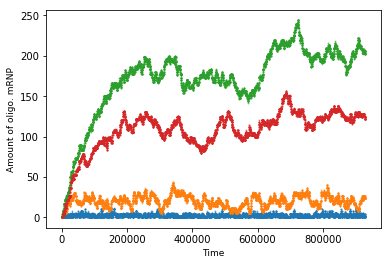

In [1368]:
#5000 nodes
#time step = 10,000
#space = 100 x 100
f = plt.figure()


#gdd_a = degree_dist.values()
plt.scatter(times,gdd_a, s=1,alpha=.5)

#gdd_b = degree_dist.values()
plt.scatter(times,gdd_b, s= 1,alpha=.5)

#gdd_c = degree_dist.values()
plt.scatter(times,gdd_c, s =1,alpha=.5)

gdd_d = degree_dist.values()
plt.scatter(times,gdd_d, s = 1,alpha=.5)

plt.ylabel('Amount of oligo. mRNP',  fontsize=9)
plt.xlabel('Time',  fontsize=9)
plt.show()
f.savefig("changing_koff.pdf", bbox_inches='tight')

In [1798]:
print g

IGRAPH UN-- 60 5 --
+ attr: name (v)
+ edges (vertex names):
(2, 1)--(1, 1), (1, 6)--(0, 6), (4, 6)--(3, 6), (2, 5)--(2, 6), (8, 5)--(8, 6)


In [1845]:
random.choice(g.vs.select(_degree_eq=1))

igraph.Vertex(<igraph.Graph object at 0x118889908>,9,{'name': '(4, 6)'})

In [1958]:
#mRNP = []
#RBP = []
#for k,v in degree_dist_all.items():
#    mRNP.append(sum(i > 0 for i in v))
#    RBP.append(sum(i < 1 for i in v))

mRNP = []
for k,v in degree_dist_all.items():
    mRNP.append(sum(i > 0 for i in v))


In [1778]:
mRNP_avg =[]
for i in range(len(mRNP)):
    mRNP_avg.append( (mRNP[i] + mRNP2[i] + mRNP3[i] + mRNP4[i])/4 )

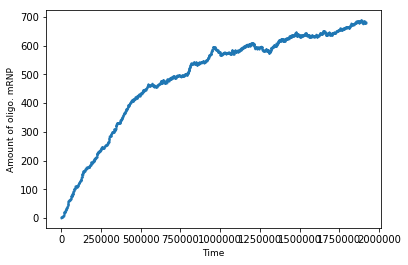

In [1959]:
plt.scatter(times,mRNP, s=1,alpha=.5)


plt.ylabel('Amount of oligo. mRNP',  fontsize=9)
plt.xlabel('Time',  fontsize=9)
plt.show()

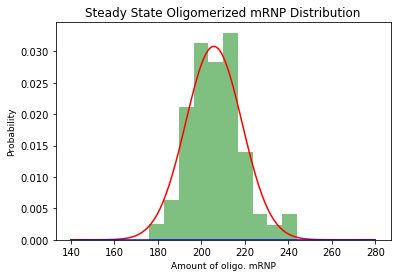

In [1287]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

data = gdd_c[7000:]
# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1

#samp = norm.rvs(loc=206.6,scale=12,size=200) ##
#samp = numpy.random.poisson(lam=s.mean(data), size=100)
samp=stats.poisson.rvs(size=100, mu=206 )

param = norm.fit(samp) # distribution fitting

f = plt.figure()

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(140,280,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution

pdf = norm.pdf(x)

title('Steady State Oligomerized mRNP Distribution')
plot(x,pdf_fitted,'r-',x,pdf,'b-')
hist(data,normed=1,alpha=.5, color='green')
plt.ylabel('Probability',  fontsize=9)
plt.xlabel('Amount of oligo. mRNP',  fontsize=9)
show()
f.savefig("steady_state_gddc.pdf", bbox_inches='tight')

# Coefficient of Variation for koff = 0.01

In [1330]:
coev = []
for k,v in degree_dist_all.items():
    lst = [float(i) for i in degree_dist_all.values()[k]]
    coev.append( 1/math.sqrt(s.mean(lst)+1) )

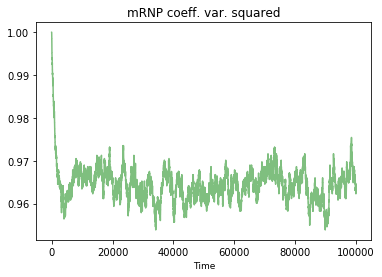

In [1331]:
f = plt.figure()
plt.plot(numpy.square(coev), color = 'green', alpha = 0.5)
title('mRNP coeff. var. squared')
plt.ylabel('',  fontsize=9)
plt.xlabel('Time',  fontsize=9)
show()
f.savefig("CV_squared.pdf", bbox_inches='tight')

# Community Movement function

In [1975]:
print g

IGRAPH UN-- 3000 375 --
+ attr: name (v)
+ edges (vertex names):
(1, 17)--(1, 18), (2, 17)--(2, 16), (1, 19)--(1, 20), (1, 42)--(1, 43), (1,
46)--(2, 46), (1, 57)--(1, 58), (1, 58)--(2, 58), (10, 11)--(10, 12), (10,
11)--(10, 10), (10, 35)--(11, 35), (10, 38)--(11, 38), (10, 4)--(9, 4), (10,
47)--(10, 48), (10, 52)--(10, 53), (11, 13)--(12, 13), (10, 34)--(9, 34), (11,
36)--(12, 36), (11, 43)--(11, 44), (12, 15)--(12, 16), (12, 5)--(12, 6), (12,
55)--(12, 56), (12, 56)--(13, 56), (13, 11)--(14, 11), (13, 18)--(13, 19),
(13, 3)--(14, 3), (13, 42)--(14, 42), (13, 44)--(14, 44), (13, 53)--(14, 53),
(14, 10)--(14, 9), (14, 11)--(15, 11), (14, 22)--(15, 22), (14, 3)--(15, 3),
(14, 30)--(14, 31), (14, 33)--(14, 34), (14, 37)--(14, 38), (14, 50)--(15,
50), (14, 52)--(14, 53), (15, 12)--(16, 12), (15, 19)--(15, 20), (15,
22)--(16, 22), (15, 50)--(15, 51), (15, 58)--(15, 59), (16, 12)--(17, 12),
(16, 23)--(17, 23), (16, 3)--(17, 3), (16, 31)--(17, 31), (16, 36)--(16, 37),
(16, 37)--(17, 37), (1

In [2033]:
# Way to find degree for specific node
g.degree(g.vs.find(name="(14, 17)")) 

1

In [2034]:
neis = g.neighbors("(14, 17)", mode="all") 
output = g.vs[neis]["name"]

In [2036]:
output

['(13, 17)']

In [2046]:
output[0]

'(13, 17)'

In [2048]:
output.strip()

AttributeError: 'list' object has no attribute 'strip'